<a href="https://colab.research.google.com/github/mariagrincon/Math-Data-Science/blob/main/problemset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO
from scipy.signal import convolve2d
from skimage import data, color, io
import IPython

import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
!pip install wandb
import wandb as wb
from skimage.io import imread

In [2]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [3]:
import imageio as io

<ipython-input-4-46a3b2b1a285>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread("https://hgtvhome.sndimg.com/content/dam/images/hgtv/fullset/2018/3/22/0/shutterstock_national-puppy-day-301891139.jpg.rend.hgtvcom.616.462.suffix/1521744692471.jpeg")


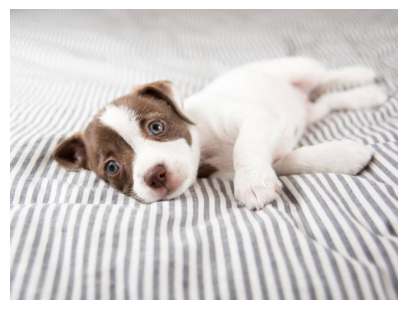

In [4]:
image = io.imread("https://hgtvhome.sndimg.com/content/dam/images/hgtv/fullset/2018/3/22/0/shutterstock_national-puppy-day-301891139.jpg.rend.hgtvcom.616.462.suffix/1521744692471.jpeg")

image = image[:,:,:]

plot(image)

In [5]:
image = image.astype(float)/255.0

In [6]:
image.shape

(462, 616, 3)

In [7]:
image = np.transpose(image, (2, 0, 1))

In [8]:
import torch.nn.functional as F
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [9]:
f = np.random.random((1,3,11,11))

In [10]:
image.shape

(3, 462, 616)

In [11]:
image = image[None,:,:,:]

In [12]:
image.shape

(1, 3, 462, 616)

In [13]:
image = torch.tensor(image)

In [14]:
import torchvision.transforms as transforms

In [15]:
resize = transforms.Compose((
    transforms.Resize(224),
    transforms.CenterCrop(224)
))

In [16]:
resize(image).shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 3, 224, 224])

In [17]:
image_np = image.squeeze().permute(1, 2, 0).numpy()

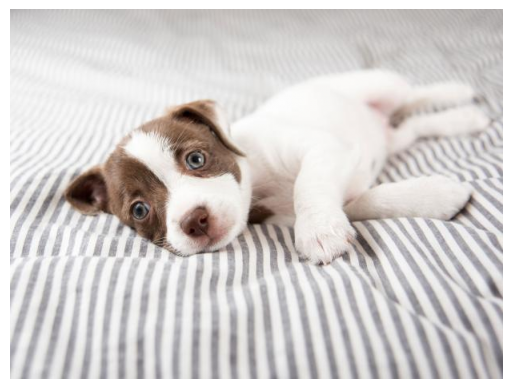

In [18]:
plt.imshow(image_np)
plt.axis('off')  # Hide axes
plt.show()

In [19]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


In [20]:
image_np = image[0].numpy()  # Assuming batch size is 1

In [21]:
grayscale_image = image_np.mean(axis=0)

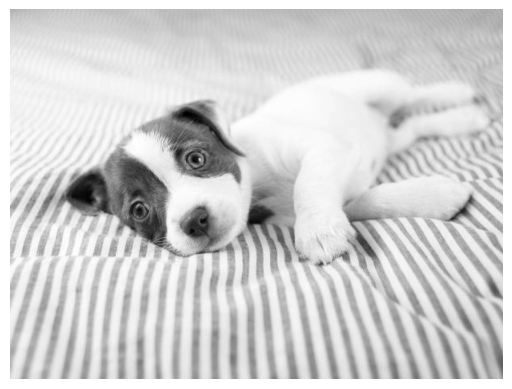

In [22]:
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')
plt.show()

<ipython-input-23-ee967154d0b8>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("https://hgtvhome.sndimg.com/content/dam/images/hgtv/fullset/2018/3/22/0/shutterstock_national-puppy-day-301891139.jpg.rend.hgtvcom.616.462.suffix/1521744692471.jpeg")


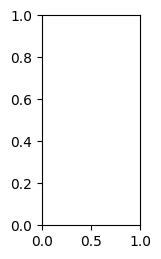

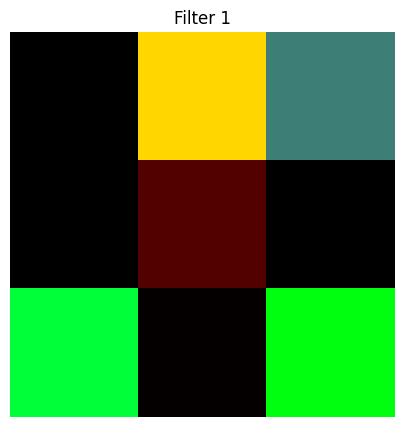

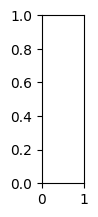

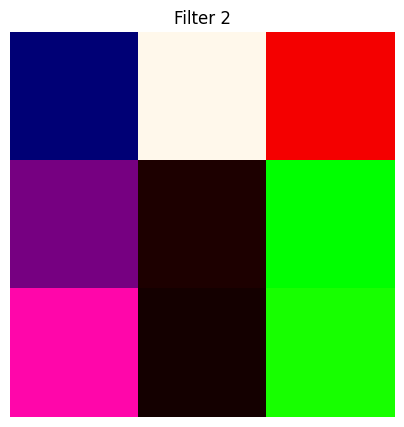

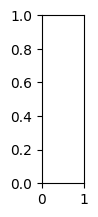

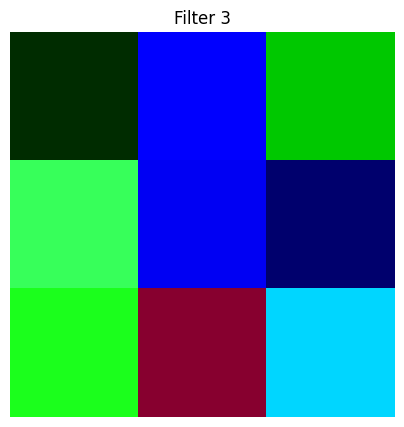

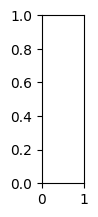

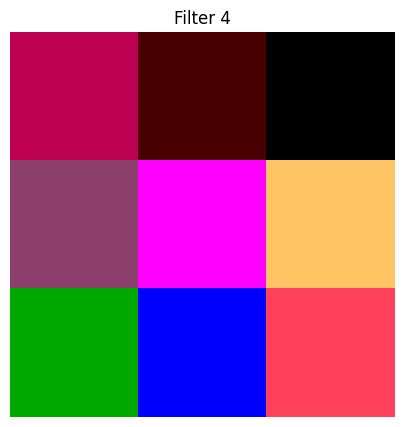

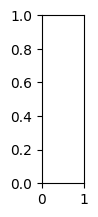

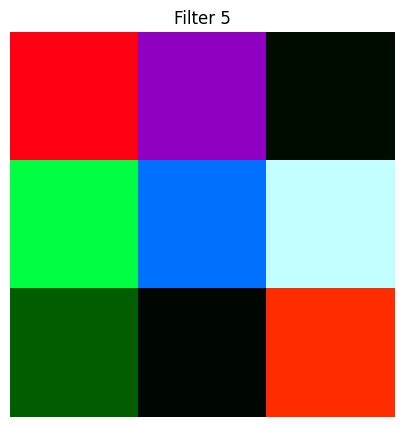

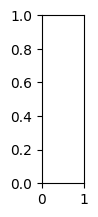

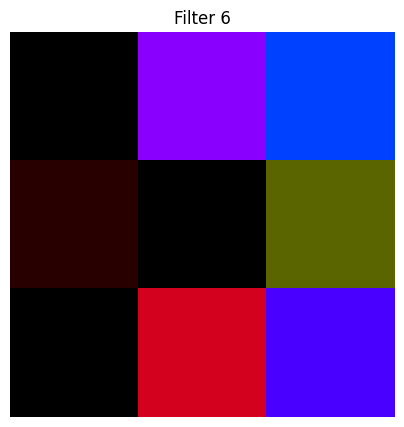

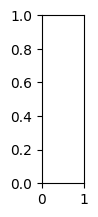

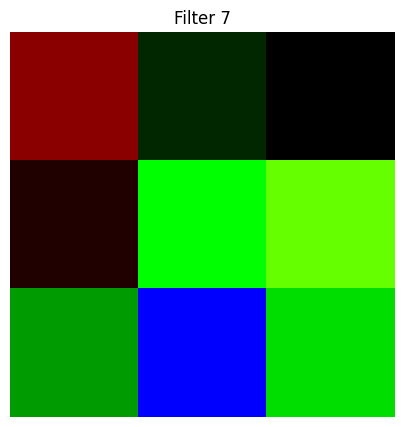

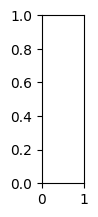

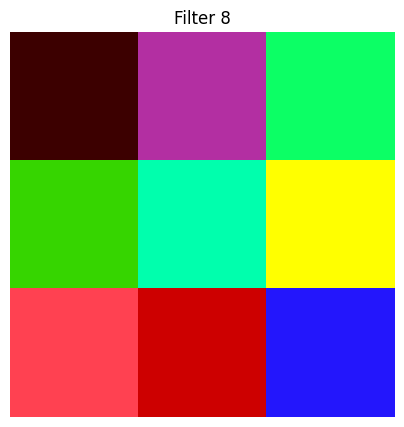

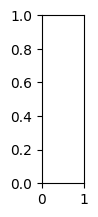

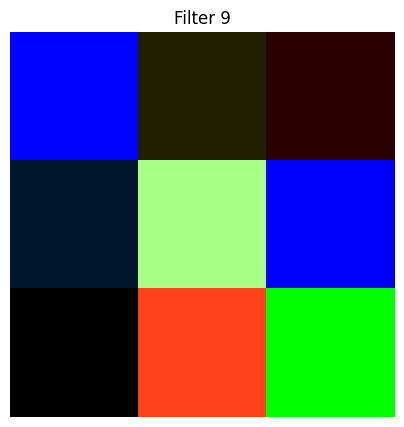

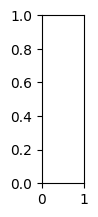

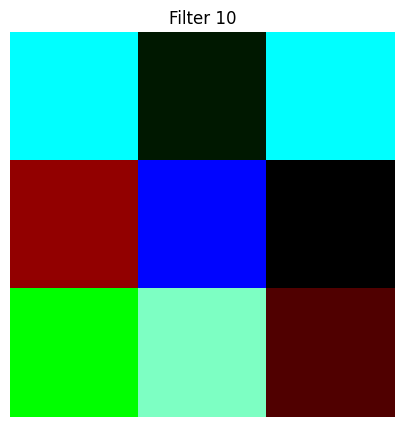

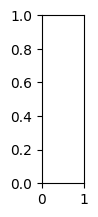

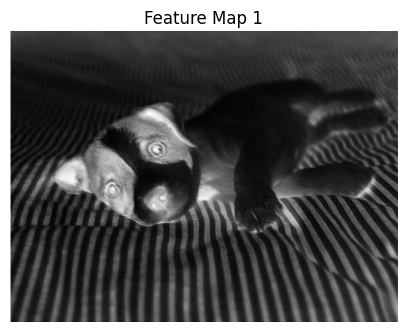

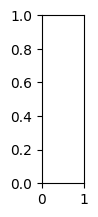

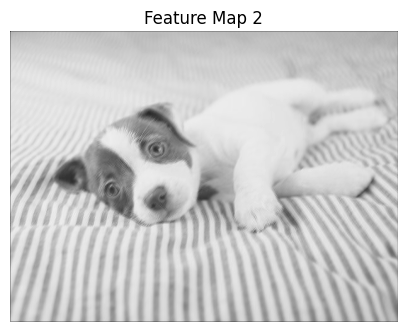

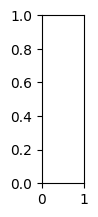

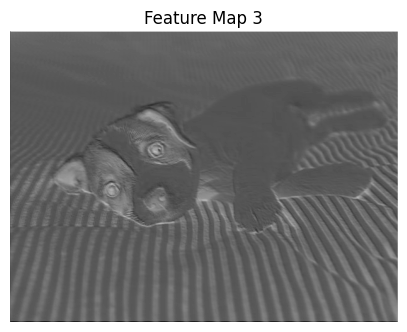

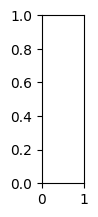

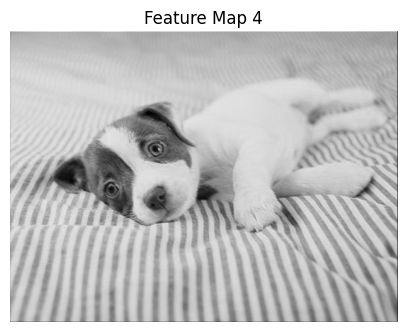

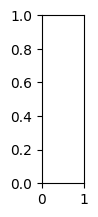

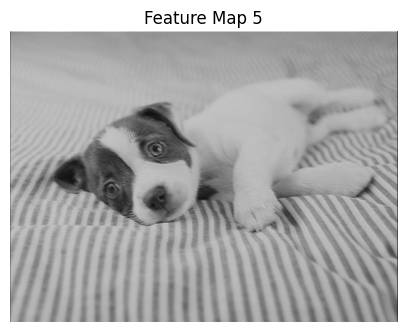

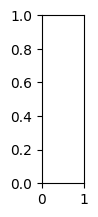

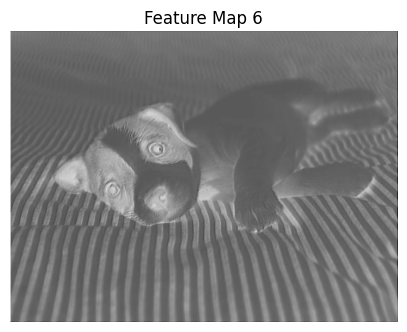

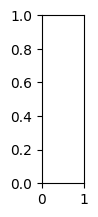

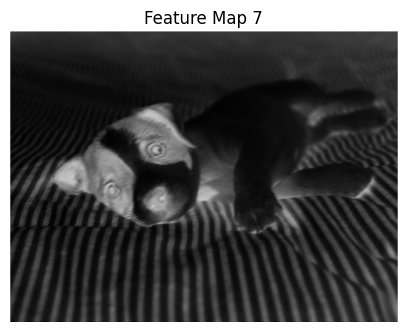

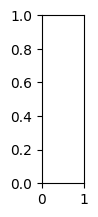

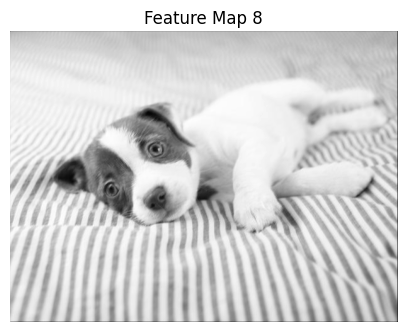

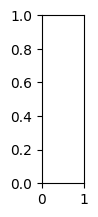

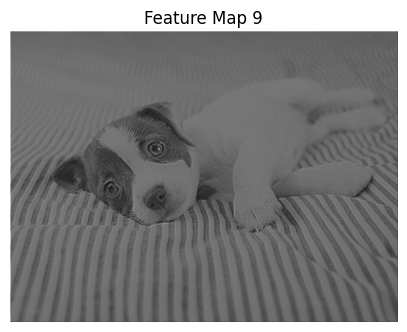

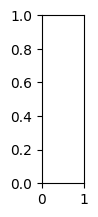

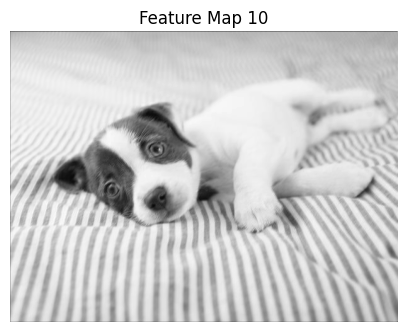

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import imageio

# Define a function to plot images
def plot(x, title=''):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap='gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    if title:
        ax.set_title(title)
    plt.show()

# Load the image
image = imageio.imread("https://hgtvhome.sndimg.com/content/dam/images/hgtv/fullset/2018/3/22/0/shutterstock_national-puppy-day-301891139.jpg.rend.hgtvcom.616.462.suffix/1521744692471.jpeg")

# Convert the image to a PyTorch tensor
image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)  # Adjust dimensions

# Define the number of filters
num_filters = 10

# Create random filters (kernels)
filters = torch.randn(num_filters, 3, 3, 3)  # 10 filters, 3 input channels, 3x3 size

# Convolve the image with the filters
feature_maps = F.conv2d(image.unsqueeze(0), filters, padding=1)

# Display the filters and feature maps
plt.figure(figsize=(15, 6))

# Plot the filters
for i in range(num_filters):
    plt.subplot(2, num_filters, i + 1)
    filter_image = filters[i].permute(1, 2, 0).numpy()  # Convert filter tensor to a NumPy array
    plot(filter_image, title=f'Filter {i + 1}')

# Plot the feature maps
for i in range(num_filters):
    plt.subplot(2, num_filters, num_filters + i + 1)
    feature_map = feature_maps[0, i].detach().numpy()
    plot(feature_map, title=f'Feature Map {i + 1}')

plt.show()
